In [26]:
import json
import requests

url = 'http://openlrw:9966/api/auth/login'

headers = {
    'X-Requested-With': 'XMLHttpRequest',
    'Content-Type': 'application/json',
}

# see db.adminUser
admin_user = {
    'username': '<adminUser.username>',
    'password': '<adminUser.password>'
}

res = requests.post(url=url, data=json.dumps(admin_user), headers=headers)
jwt = res.json()["token"]
#print(jwt)

In [27]:
url = 'http://openlrw:9966/api/events'

headers = {
    'Content-Type': 'application/json',
    'Authorization': f"Bearer {jwt}"
}

res = requests.get(url=url, headers=headers)
print(json.dumps(res.json(), indent=2))

[
  {
    "id": "urn:uuid:e0e6a3f8-8c8a-4023-a360-045bc43dd7d1",
    "action": "Viewed",
    "object": {
      "name": "test forum discussion",
      "isPartOf": {
        "name": "test forum",
        "isPartOf": {
          "name": "\u5b66\u8a8d LMS",
          "@id": "1",
          "@type": "CourseSection"
        },
        "@id": "1",
        "@type": "Forum"
      },
      "@id": "1",
      "@type": "Thread"
    },
    "edApp": {
      "@id": "RCOS LRS",
      "@type": "SoftwareApplication"
    },
    "eventTime": "2019-11-29T06:31:23Z",
    "timeZoneOffset": 0,
    "@context": "http://purl.imsglobal.org/ctx/caliper/v1p1",
    "@type": "ViewEvent",
    "actor": {
      "name": "Eileen Schmitt@nii.ac.jp",
      "description": "Voluptatem odio autem autem voluptate neque natus.",
      "@id": "3",
      "@type": "Person"
    }
  },
  {
    "id": "urn:uuid:c015635a-9450-4467-b70c-ff50d5884eb3",
    "action": "Submitted",
    "object": {
      "name": "test assign",
      "descriptio

※ 以下はVideo.jsの動画ログをステートメントとして登録した場合にのみ実行可能

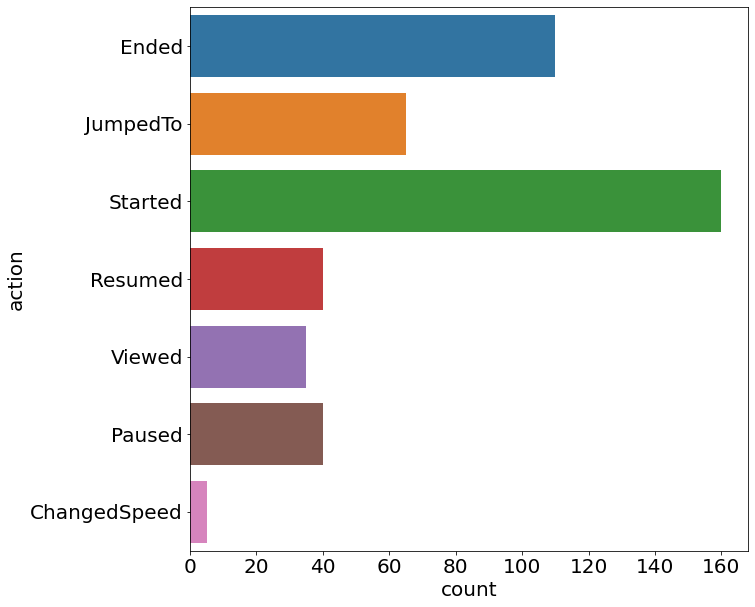

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

dic = json.loads(json.dumps(res.json()))

# 動画ログを抽出する
data = []
for d in dic:
    if d['object']['@type'] == 'VideoObject' or d['object']['@type'] == 'MediaLocation':
        data.append(d)

# ユーザの行動を棒グラフで可視化する
df = pd.DataFrame(data)
        
plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = 20
sns.countplot(y='action', data=df)